# Ingest

In [1]:
%%capture
!wget https://s201.q4cdn.com/141608511/files/doc_presentations/2024/Feb/NVDA-Company-Overview-2024-02-21.pdf -O nvidia.pdf

In [1]:
PDF_FILE: str = "./nvidia.pdf"
IMAGE_DIR = "slides_img"

In [2]:
import os
import chromadb
from IPython.display import Image, display
import textwrap

from utils import ImageBindEmbeddingFunction, DummyLoader, convert_pdf_to_images

Specify source file and destination directory

In [3]:
num_pages = convert_pdf_to_images(PDF_FILE, IMAGE_DIR)
print(f"there are {num_pages} images extracted from this slide deck {PDF_FILE}")

The document has 40 pages
there are 40 images extracted from this slide deck ./nvidia.pdf


In [4]:
multimodal_ib = ImageBindEmbeddingFunction()
dummy_loader = DummyLoader()

chroma_client = chromadb.Client()

multimodal_db = chroma_client.get_or_create_collection(
    name="multimodal_rag_nvidia", embedding_function=multimodal_ib, data_loader=dummy_loader
)

folder_path = f"./{IMAGE_DIR}/"
file_names = sorted(os.listdir(IMAGE_DIR))

files = [folder_path + file_name for file_name in file_names]
ids = [str(index) for index in range(len(files))]
file_dicts = [{"location": f"{file_name}"} for file_name in files]


multimodal_db.add(ids=ids, uris=files, metadatas=file_dicts)


assert (
    multimodal_db.count() == num_pages
), "The number of images in the database does not match the number of images in the directory."

# RAG

Reference Image


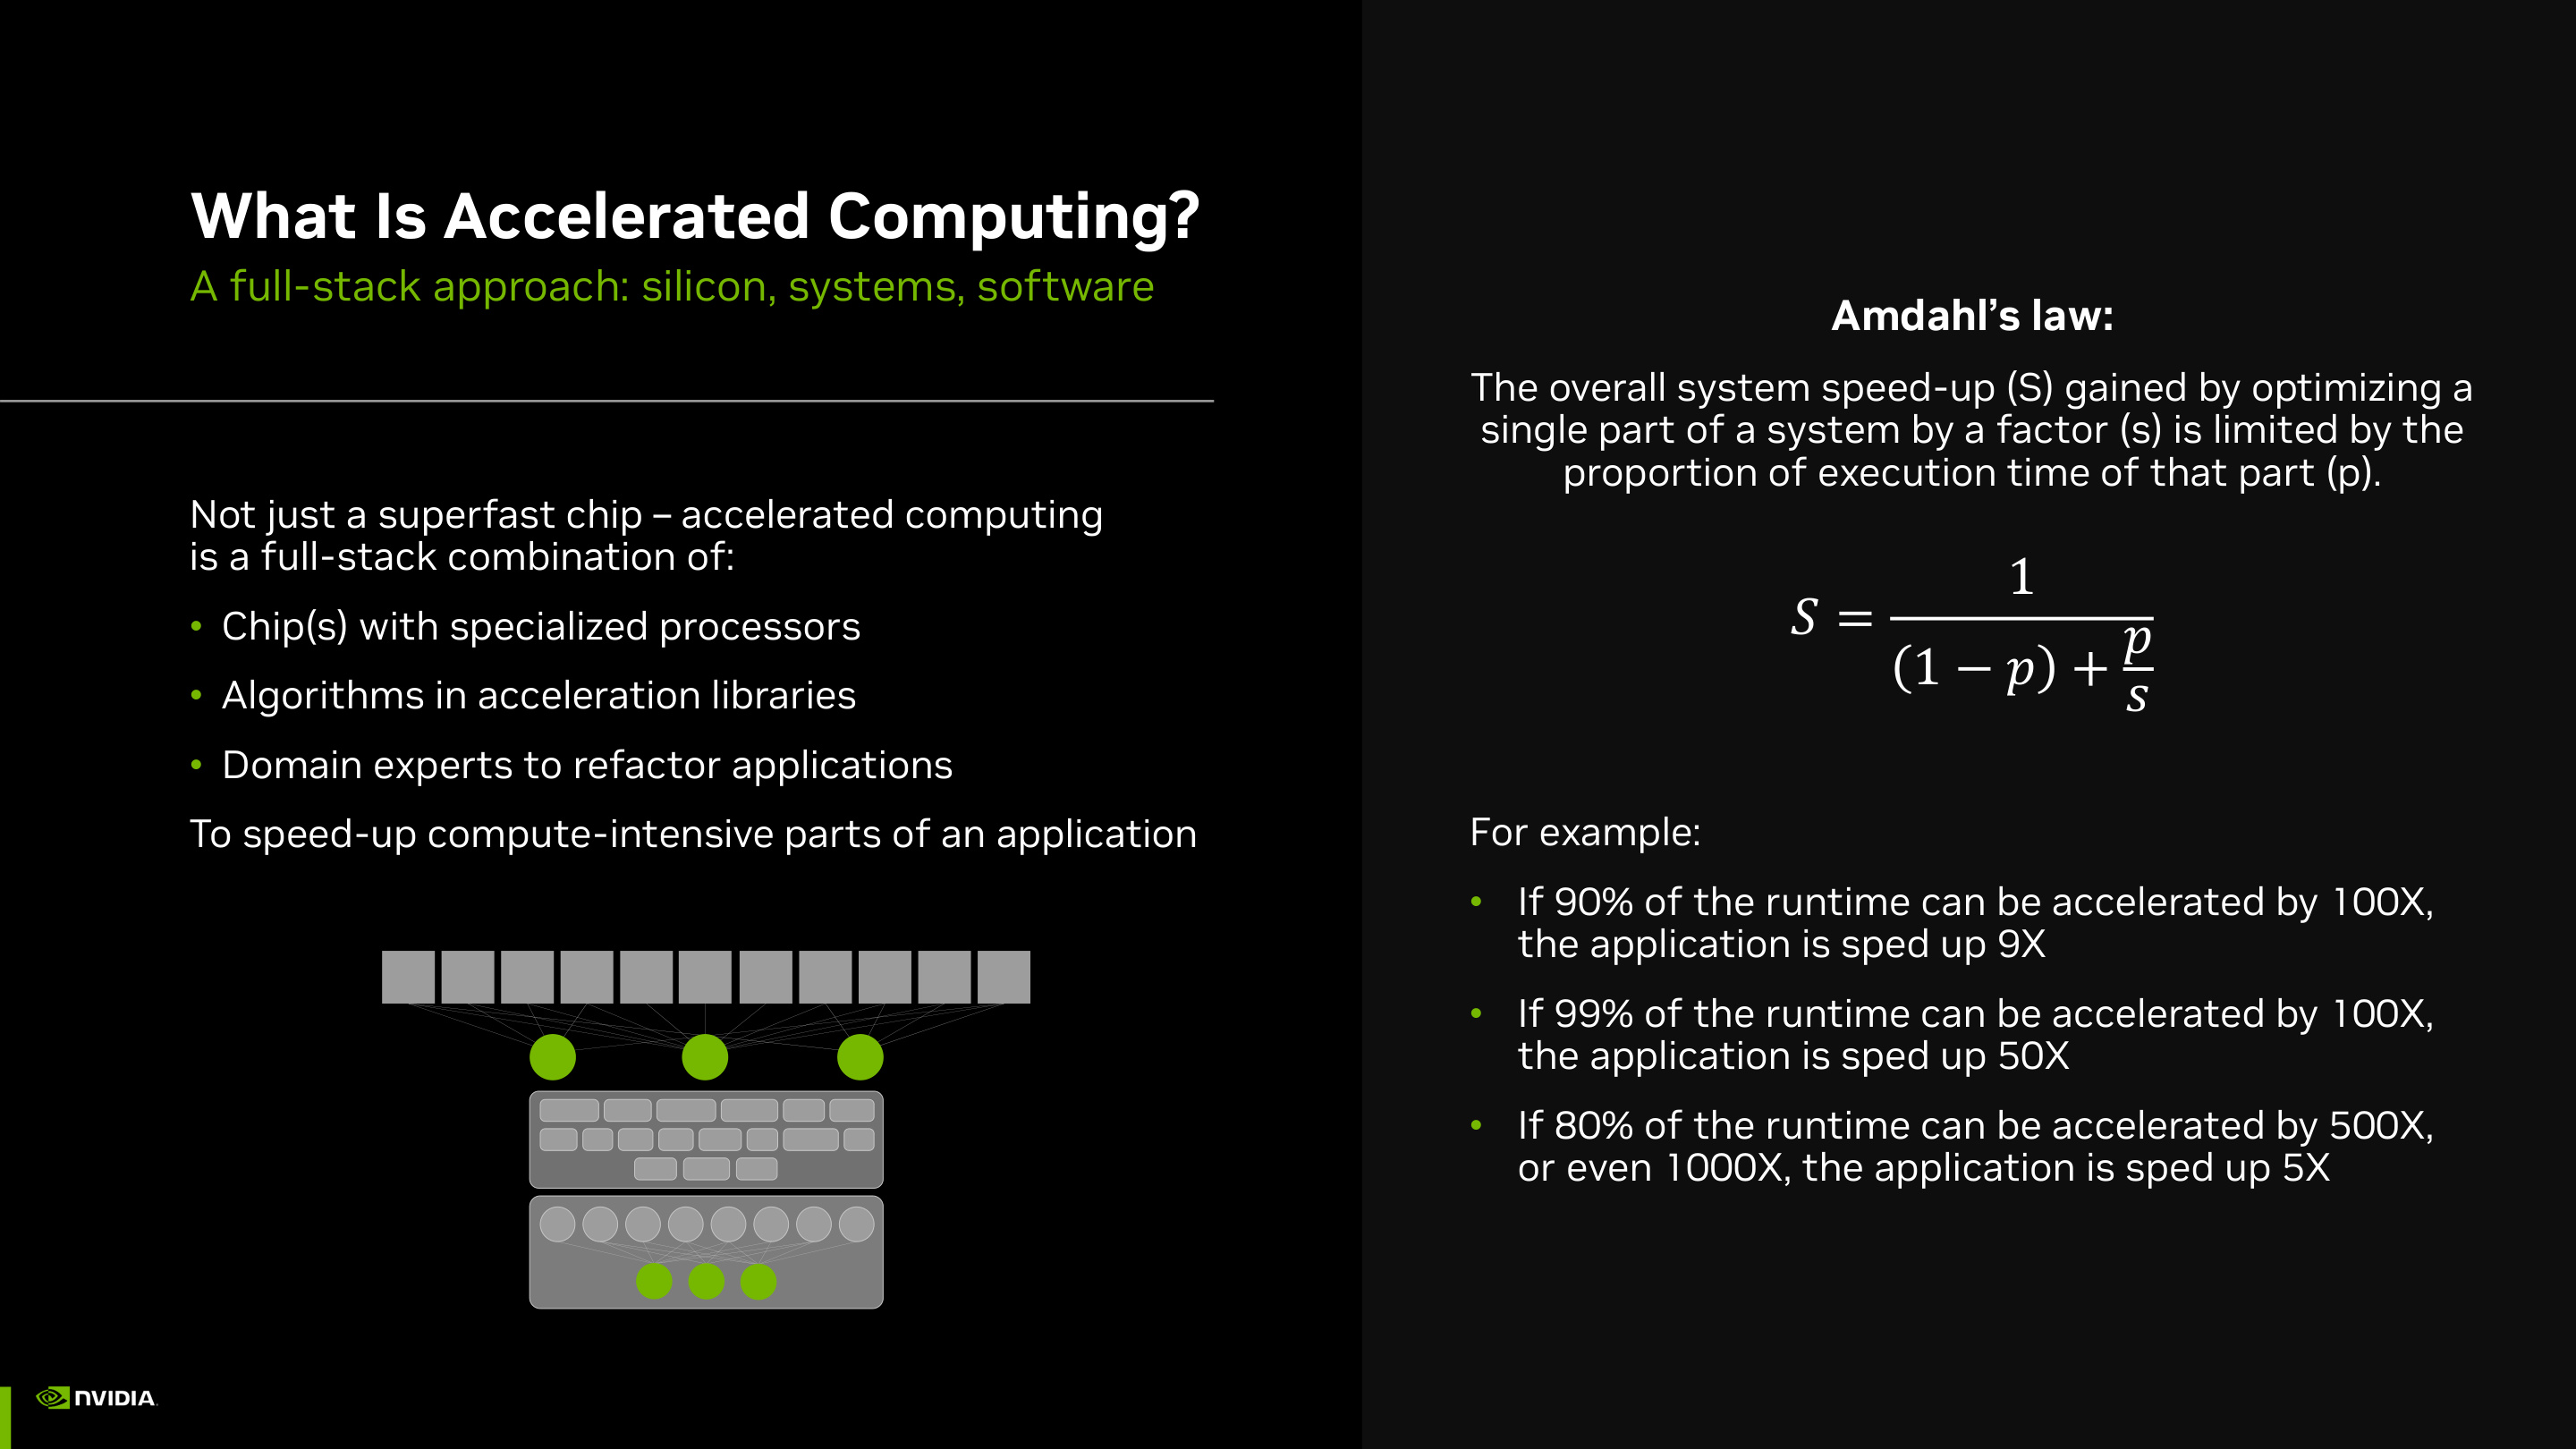

Answer:
Accelerated computing refers to the use of specialized
hardware and software to enhance the performance of
computing tasks, particularly in the areas of artificial
intelligence, machine learning, and high-performance
computing. This can include the use of specialized chips,
systems, and software designed to optimize the execution of
complex algorithms and data-intensive applications. The goal
of accelerated computing is to achieve faster processing
speeds and improved efficiency, enabling the solution of
problems that would be too time-consuming or resource-
intensive for traditional computing methods.


In [5]:
from utils import query

question = 'Define Accelerated Computing?'

# Query vector db
image, answer = query(question, multimodal_db)
print('Reference Image')
display(Image(filename=image))
print('Answer:')
print(textwrap.fill(answer, width=60))


Reference Image


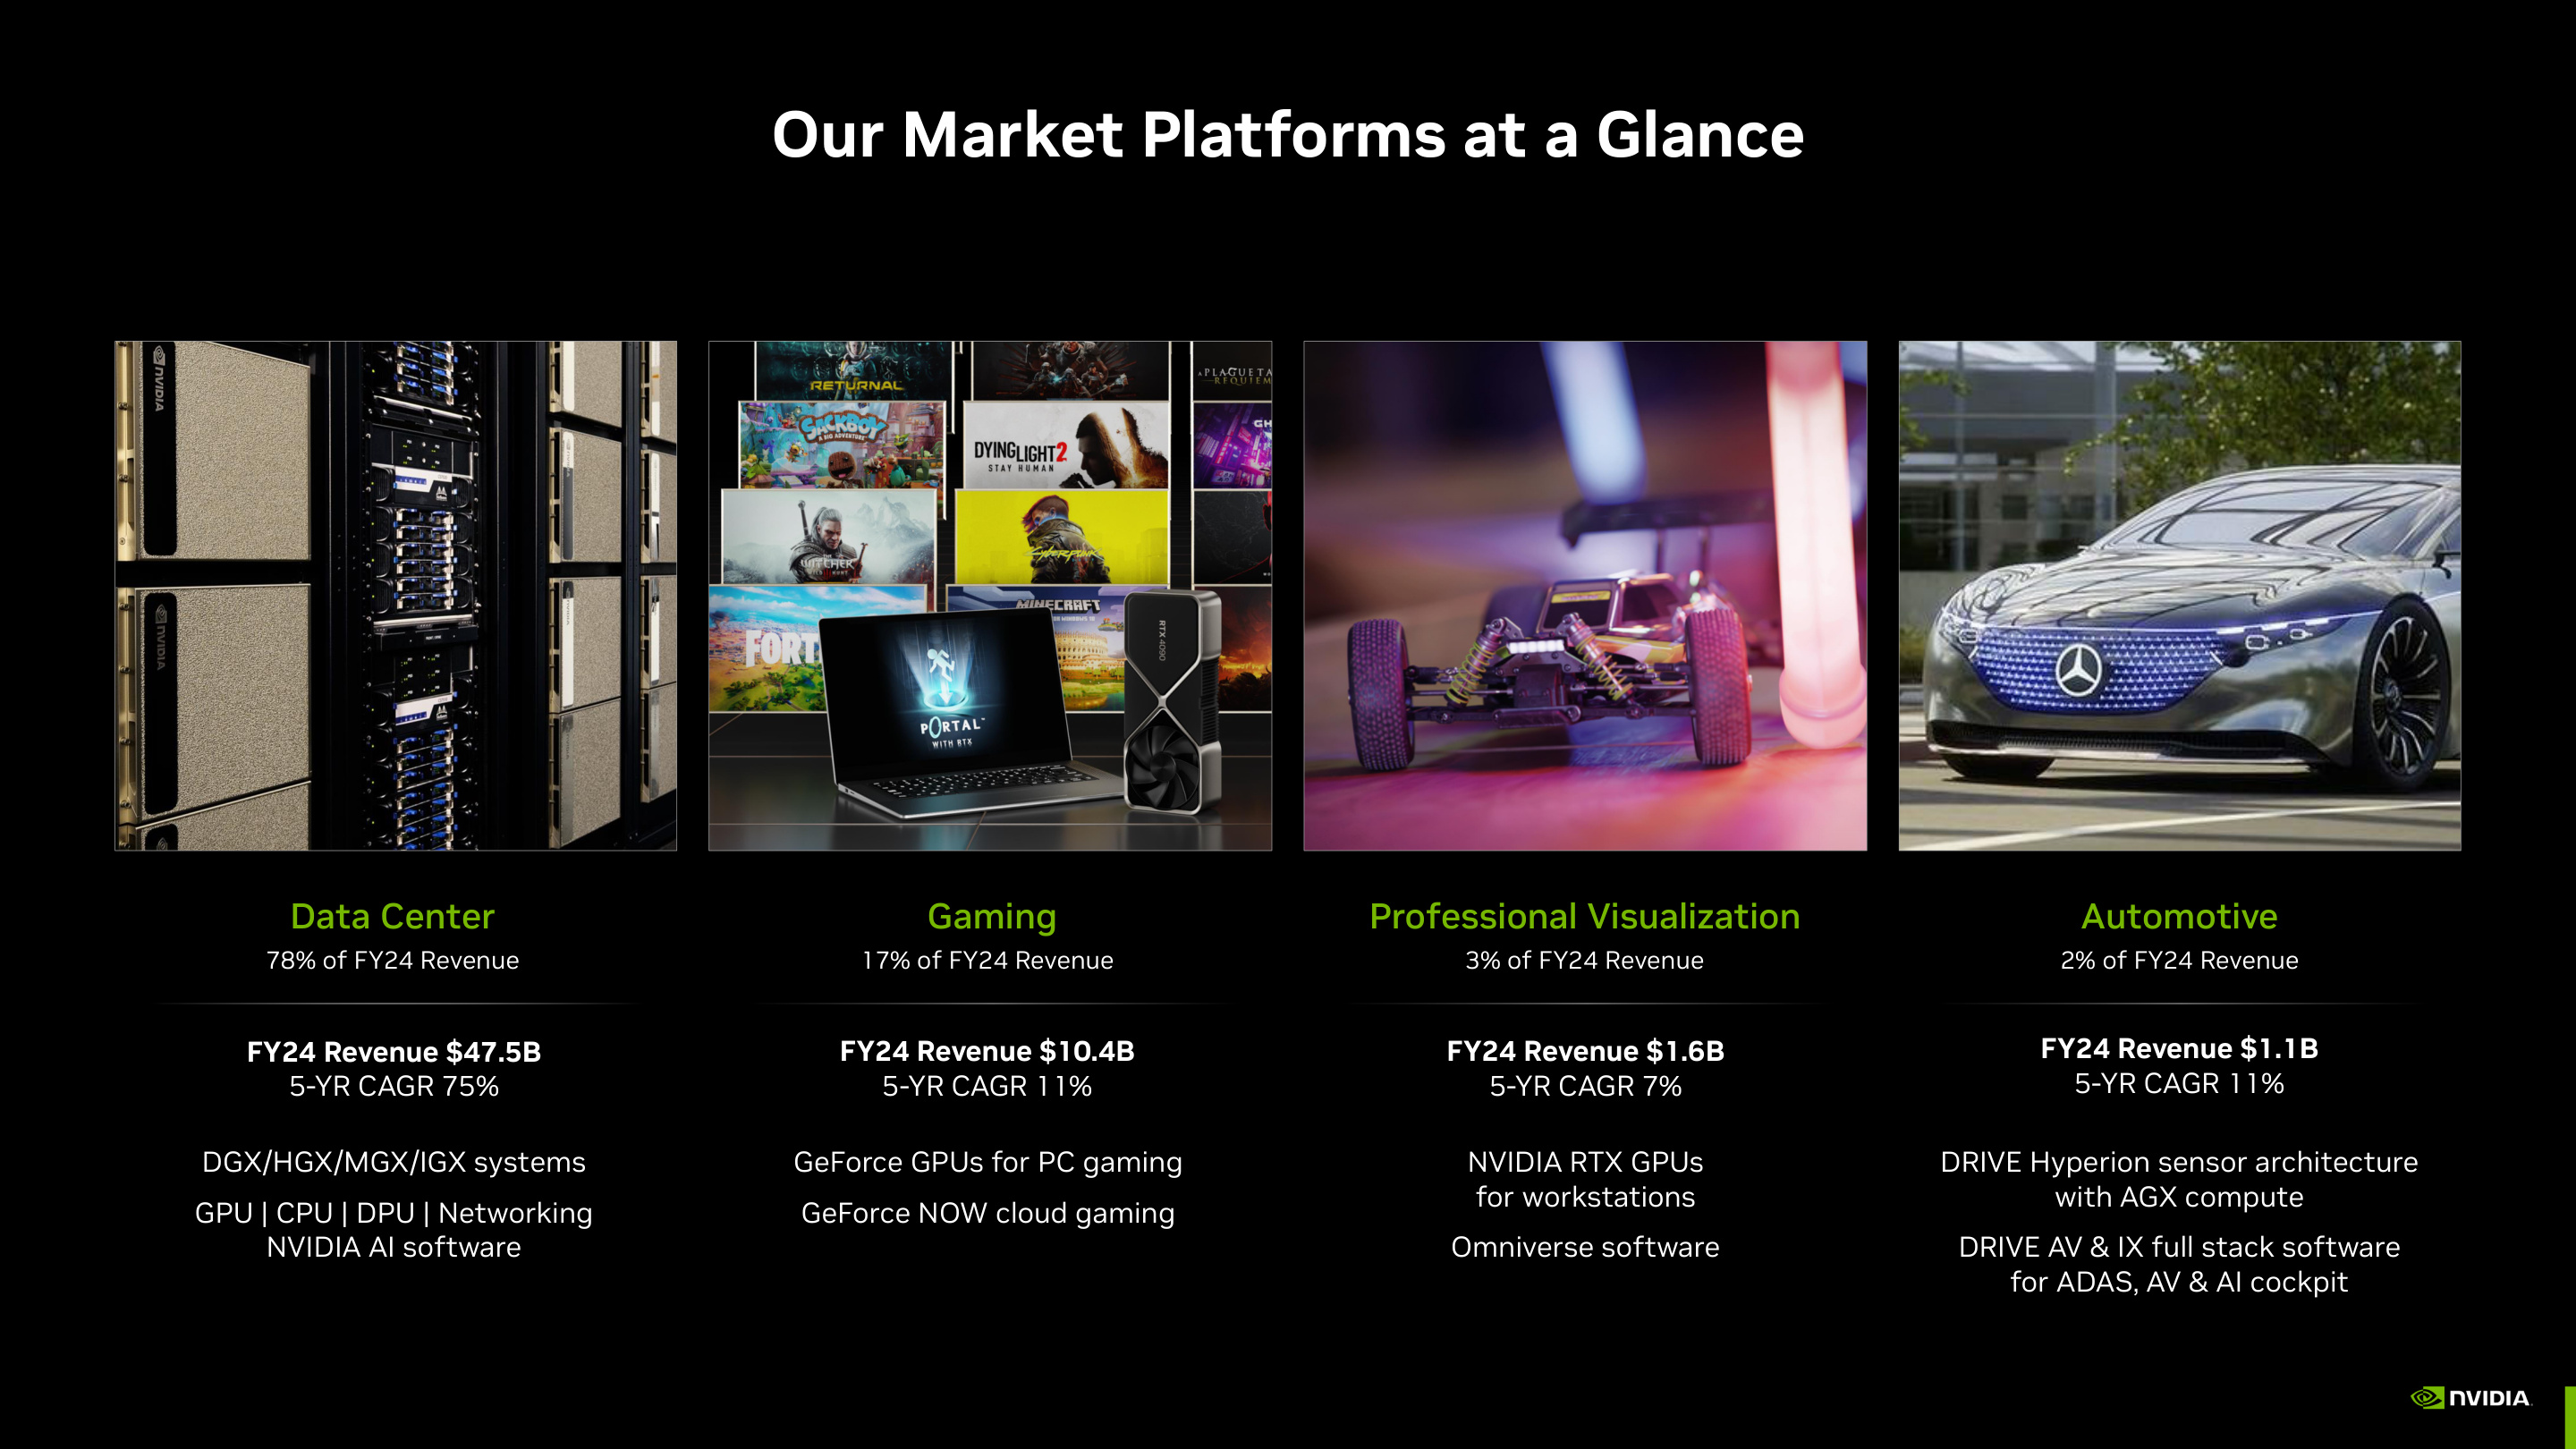

Answer:
The percentage share of gaming in Nvidia's Revenue in FY24 is 17%.


In [6]:

question = "What is the percentage share of gaming in Nvidia's Revenue in FY24?"

# Query vector db
image, answer = query(question, multimodal_db)
print('Reference Image')
display(Image(filename=image))
print('Answer:')
print(answer)

Reference Image


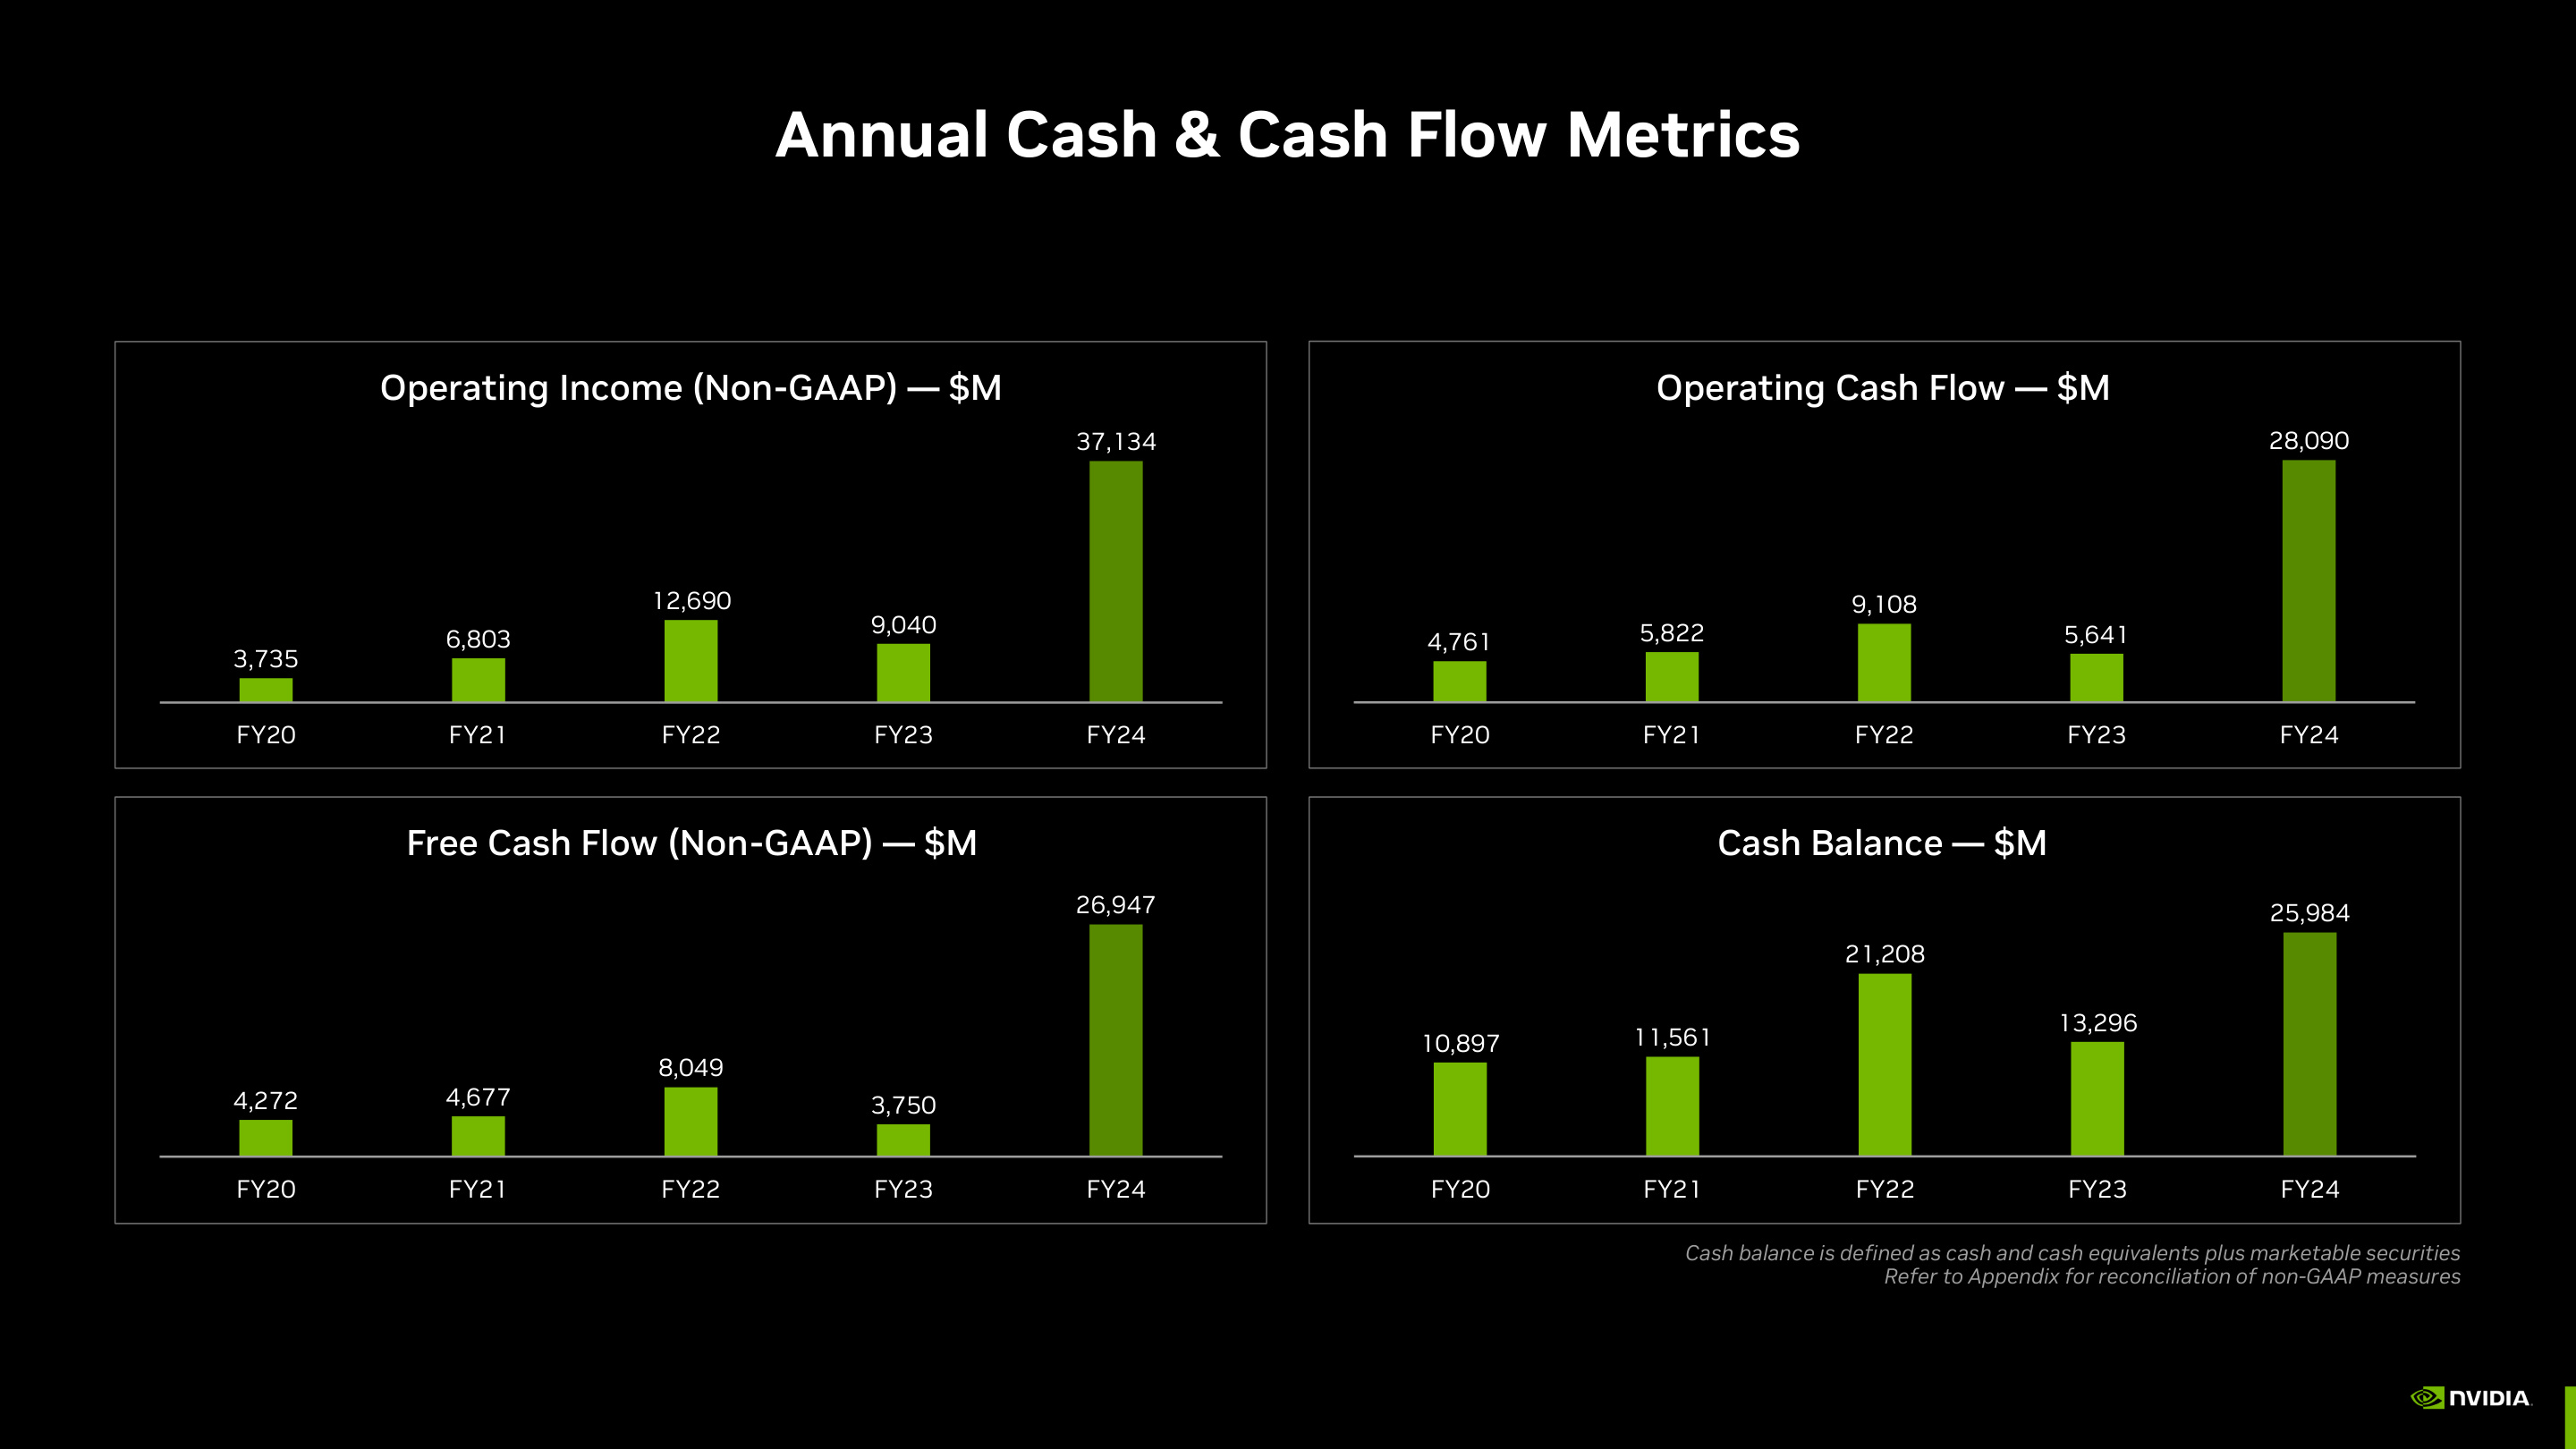

Answer:
I did not find the answer to this question in the slide deck.


In [7]:

question = "What is AMD's Revenue in FY24?"


# Query vector db
image, answer = query(question, multimodal_db)
print('Reference Image')
display(Image(filename=image))
print('Answer:')
print(answer)